In [4]:
#Cau 1
from sklearn.cluster import KMeans
import numpy as np

# Khởi động 2 tâm
my_centroids = np.array([[1, 1], [2, 1]])

# Các điểm dữ liệu cần gom nhóm
data = np.array([[1, 1], [2, 1], [4, 3], [5, 4]])

# Thực hiện gom nhóm với KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10, init= 'random').fit(data)

# Hiển thị kết quả gom nhóm
kmeans.labels_

# Hiển thị tâm của các nhóm sau khi đã được gom
kmeans.cluster_centers_

# Dự đoán nhóm cho các phần tử mới
kmeans.predict([[1, 2], [4, 4]])

array([0, 1], dtype=int32)

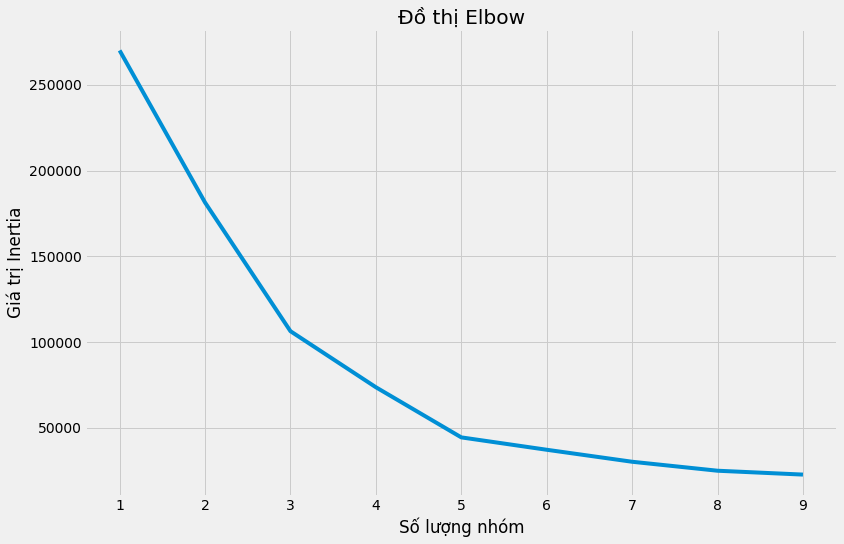

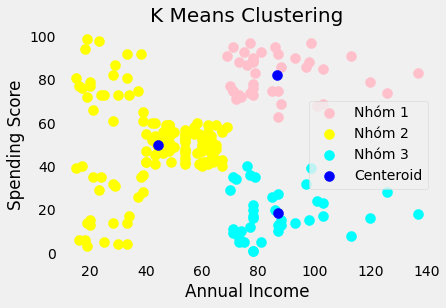

In [9]:
#Cau 2a
# Nạp các gói thư viện cần thiết
import pandas as pd

# 1. Chuẩn bị dữ liệu
# Đọc dữ liệu từ tập tin csv
df = pd.read_csv('https://raw.githubusercontent.com/ltdaovn/dataset/master/ABC_Customers.csv')

# Lấy dữ liệu thu nhập hằng năm (Annual Income)
# và điểm thành viên (Spending Score) để phân lớp
X = df.iloc[:, [3, 4]].values

# 2. Tiến hành gom nhóm
# Khi sử dụng kmeans để gom nhóm, câu hỏi đặt ra là với dataset đã có,
# chúng ta sẽ phân thành bao nhiêu cụm là hợp lý (tối ưu)?
# Trong ví dụ này chúng ta sẽ sử dụng phương pháp Elbow để xác định số cụm k.
# Tài liệu tham khảo phương pháp Elbow
# https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set
# Chạy thuật toán KMeans với k=(1, 10)
from sklearn.cluster import KMeans
clusters = []
for i in range(1, 10):
  km = KMeans(n_clusters=i, n_init = 10).fit(X)
  clusters.append(km.inertia_)

import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title('Đồ thị Elbow')
ax.set_xlabel('Số lượng nhóm')
ax.set_ylabel('Giá trị Inertia')
plt.show()
plt.cla()
# Qua đồ thị trên, chúng ta thấy số lượng cluster thích hợp là từ 3 đến 5 clusters

# Phân tích dữ liệu được gom thành 3 nhóm
km3 = KMeans(n_clusters=3, n_init = 10)
y_means = km3.fit_predict(X)
#print(y_means)

plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'pink',
label = 'Nhóm 1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'yellow',
label = 'Nhóm 2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'cyan',
label = 'Nhóm 3')
plt.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:, 1], s = 100, c = 'blue' , label = 'Centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

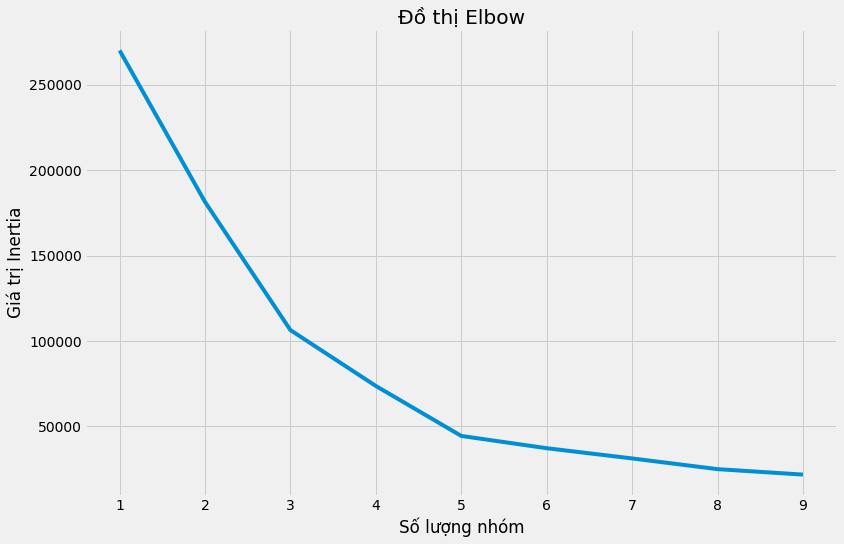

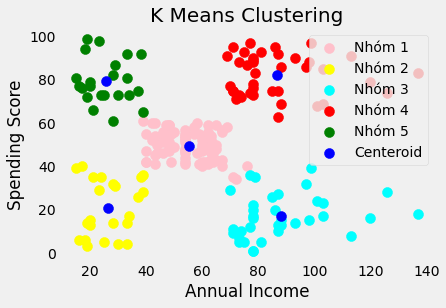

In [10]:
#Cau 2b
# Nạp các gói thư viện cần thiết
import pandas as pd

# 1. Chuẩn bị dữ liệu
# Đọc dữ liệu từ tập tin csv
df = pd.read_csv('https://raw.githubusercontent.com/ltdaovn/dataset/master/ABC_Customers.csv')

# Lấy dữ liệu thu nhập hằng năm (Annual Income)
# và điểm thành viên (Spending Score) để phân lớp
X = df.iloc[:, [3, 4]].values

# 2. Tiến hành gom nhóm
# Khi sử dụng kmeans để gom nhóm, câu hỏi đặt ra là với dataset đã có,
# chúng ta sẽ phân thành bao nhiêu cụm là hợp lý (tối ưu)?
# Trong ví dụ này chúng ta sẽ sử dụng phương pháp Elbow để xác định số cụm k.
# Tài liệu tham khảo phương pháp Elbow
# https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set
# Chạy thuật toán KMeans với k=(1, 10)
from sklearn.cluster import KMeans
clusters = []
for i in range(1, 10):
  km = KMeans(n_clusters=i, n_init = 10).fit(X)
  clusters.append(km.inertia_)

import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title('Đồ thị Elbow')
ax.set_xlabel('Số lượng nhóm')
ax.set_ylabel('Giá trị Inertia')
plt.show()
plt.cla()
# Qua đồ thị trên, chúng ta thấy số lượng cluster thích hợp là từ 3 đến 5 clusters

# Phân tích dữ liệu được gom thành 3 nhóm
km3 = KMeans(n_clusters=5, n_init = 10)
y_means = km3.fit_predict(X)
#print(y_means)

plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'pink',
label = 'Nhóm 1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'yellow',
label = 'Nhóm 2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'cyan',
label = 'Nhóm 3')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 100, c = 'red',
label = 'Nhóm 4')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 100, c = 'green',
label = 'Nhóm 5')
plt.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:, 1], s = 100, c = 'blue' , label = 'Centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

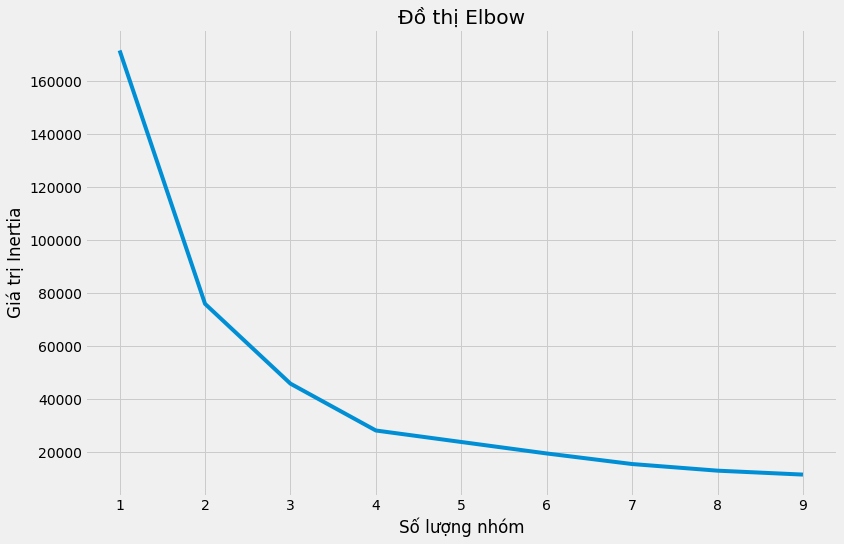

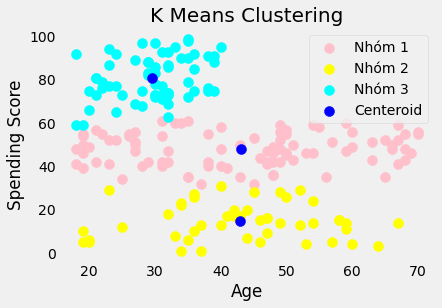

In [12]:
#Cau 2c
# 1. Chuẩn bị dữ liệu
# Đọc dữ liệu từ tập tin csv
df = pd.read_csv('https://raw.githubusercontent.com/ltdaovn/dataset/master/ABC_Customers.csv')

# Lấy dữ liệu độ tuổi (Age)
# và điểm mua sắm (Spending Score) để phân lớp
X = df.iloc[:, [2, 4]].values

# 2. Tiến hành gom nhóm
# Khi sử dụng kmeans để gom nhóm, câu hỏi đặt ra là với dataset đã có,
# chúng ta sẽ phân thành bao nhiêu cụm là hợp lý (tối ưu)?
# Trong ví dụ này chúng ta sẽ sử dụng phương pháp Elbow để xác định số cụm k.
# Tài liệu tham khảo phương pháp Elbow
# https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set
# Chạy thuật toán KMeans với k=(1, 10)
from sklearn.cluster import KMeans
clusters = []
for i in range(1, 10):
  km = KMeans(n_clusters=i, n_init = 10).fit(X)
  clusters.append(km.inertia_)

import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title('Đồ thị Elbow')
ax.set_xlabel('Số lượng nhóm')
ax.set_ylabel('Giá trị Inertia')
plt.show()
plt.cla()
# Qua đồ thị trên, chúng ta thấy số lượng cluster thích hợp là từ 2 đến 4 clusters

# Phân tích dữ liệu được gom thành 3 nhóm
km3 = KMeans(n_clusters=3, n_init = 10)
y_means = km3.fit_predict(X)
#print(y_means)

plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'pink',
label = 'Nhóm 1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'yellow',
label = 'Nhóm 2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'cyan',
label = 'Nhóm 3')
plt.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:, 1], s = 100, c = 'blue' , label = 'Centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

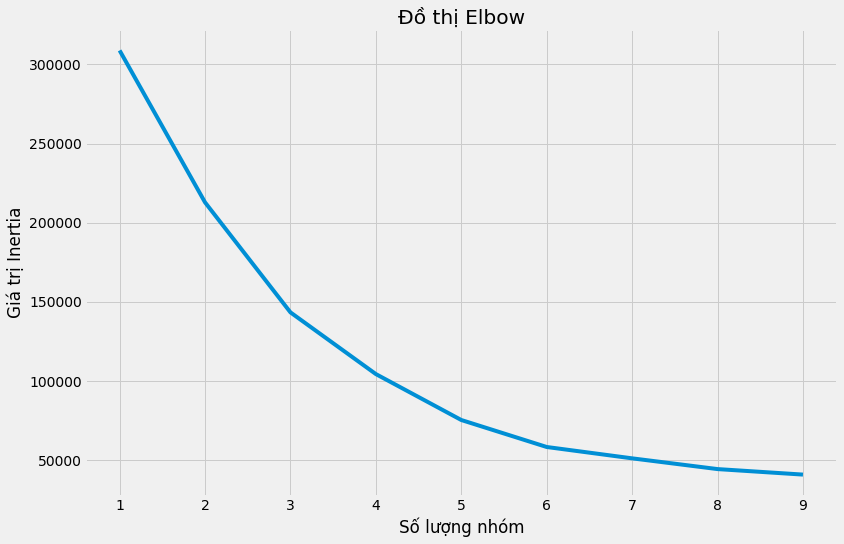

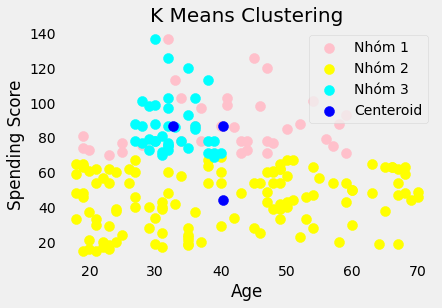

In [18]:
#Cau 2d
# 1. Chuẩn bị dữ liệu
# Đọc dữ liệu từ tập tin csv
df = pd.read_csv('https://raw.githubusercontent.com/ltdaovn/dataset/master/ABC_Customers.csv')

# Lấy dữ liệu độ tuổi (Age), thu nhập hàng năm (Annual Income)
# và điểm mua sắm (Spending Score) để phân lớp
X = df.iloc[:, [2, 3, 4]].values

# 2. Tiến hành gom nhóm
# Khi sử dụng kmeans để gom nhóm, câu hỏi đặt ra là với dataset đã có,
# chúng ta sẽ phân thành bao nhiêu cụm là hợp lý (tối ưu)?
# Trong ví dụ này chúng ta sẽ sử dụng phương pháp Elbow để xác định số cụm k.
# Tài liệu tham khảo phương pháp Elbow
# https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set
# Chạy thuật toán KMeans với k=(1, 10)
from sklearn.cluster import KMeans
clusters = []
for i in range(1, 10):
  km = KMeans(n_clusters=i, n_init = 10).fit(X)
  clusters.append(km.inertia_)

import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title('Đồ thị Elbow')
ax.set_xlabel('Số lượng nhóm')
ax.set_ylabel('Giá trị Inertia')
plt.show()
plt.cla()
# Qua đồ thị trên, chúng ta thấy số lượng cluster thích hợp là từ 3 đến 6 clusters

# Phân tích dữ liệu được gom thành 3 nhóm
km3 = KMeans(n_clusters=3, n_init = 10)
y_means = km3.fit_predict(X)
#print(y_means)

plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'pink',
label = 'Nhóm 1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'yellow',
label = 'Nhóm 2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'cyan',
label = 'Nhóm 3')

plt.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:, 1], s = 100, c = 'blue' , label = 'Centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

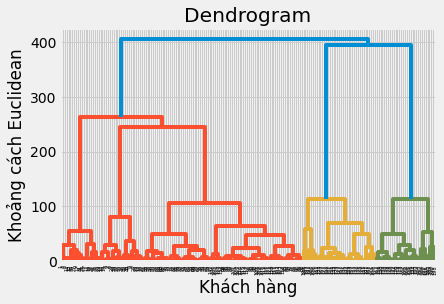

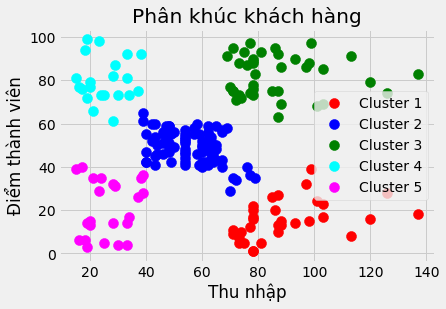

In [20]:
#Cau 3a
# Nạp các gói thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt

# 1. Chuẩn bị dữ liệu
# Đọc dữ liệu từ tập tin csv
df = pd.read_csv('https://raw.githubusercontent.com/ltdaovn/dataset/master/ABC_Customers.csv')
# Lấy dữ liệu thu nhập hằng năm (Annual Income) và điểm thành viên (Spending Score) để phân lớp
X = df.iloc[:, [3, 4]].values
#print(X)

# 2. Tiến hành gom nhóm
# Khi tiến hành các giải thuật để gom nhóm,
# câu hỏi đặt ra là với dataset đã có,
# chúng ta sẽ phân thành bao nhiêu cụm là hợp lý (tối ưu)?
# Trong ví dụ này chúng ta sẽ sử dụng Dendrogram để xác định số cụm.
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Khách hàng')
plt.ylabel('Khoảng cách Euclidean')
plt.show()

# Qua đồ thị Dendrogram, chúng ta thấy số cụm tối ưu có khả năng là 5 cụm
# Chúng ta tiến hành gom cụm với số cụm là 5
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Hiển thị các cụm dữ liệu
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Phân khúc khách hàng')
plt.xlabel('Thu nhập')
plt.ylabel('Điểm thành viên')
plt.legend()
plt.show()

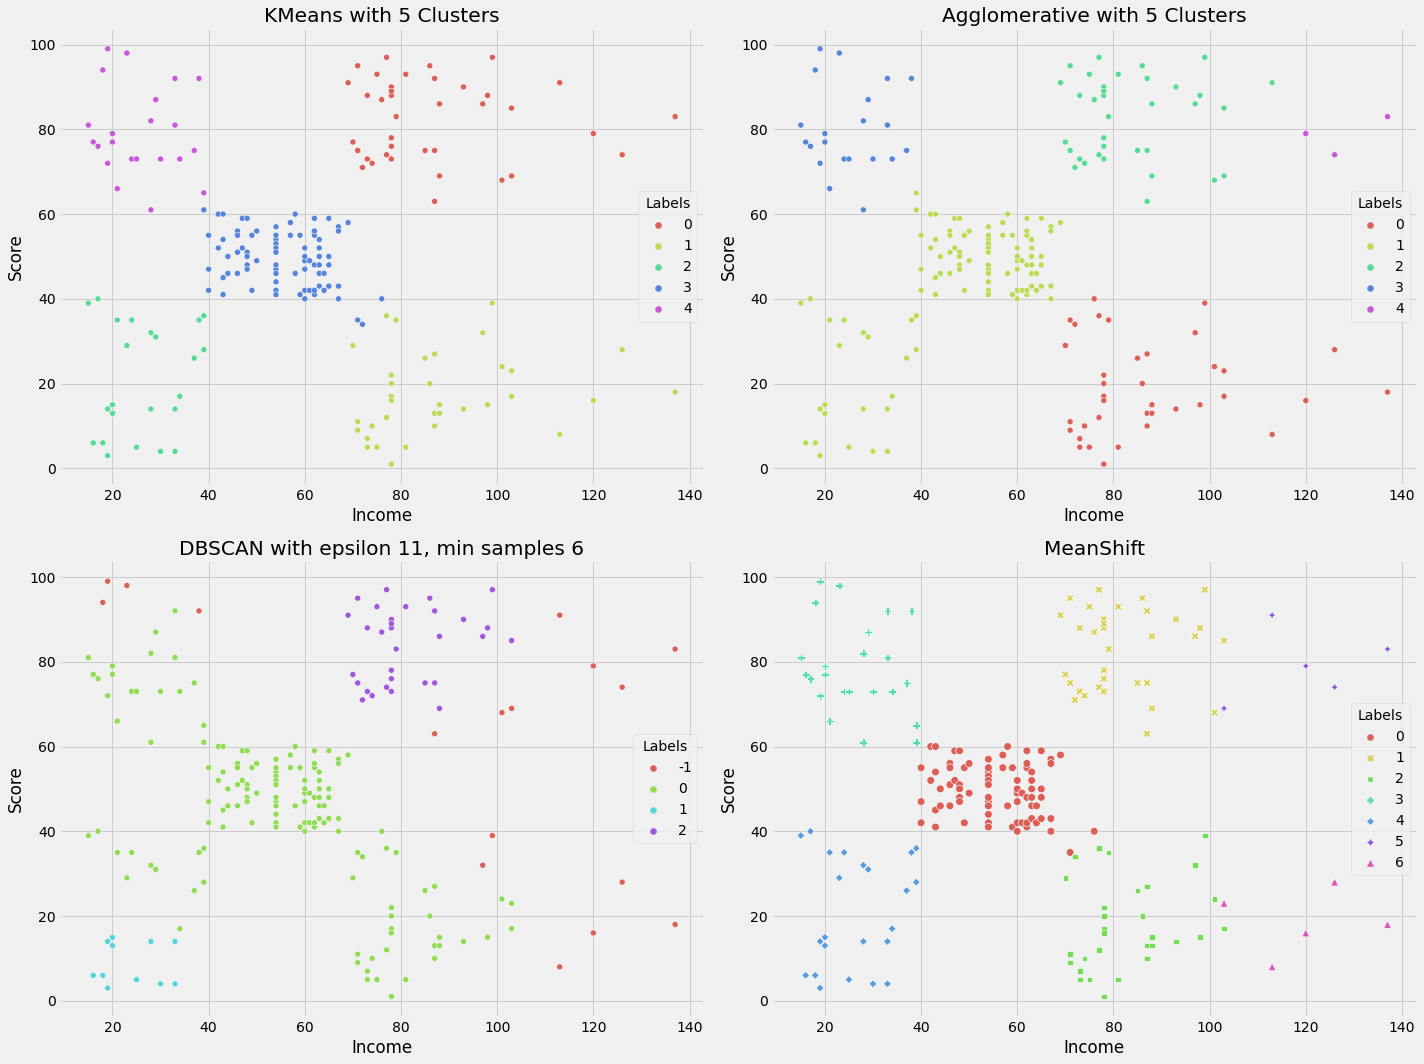

In [39]:
#Cau 3b
# Nạp các gói thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Chuẩn bị dữ liệu
# Đọc dữ liệu từ tập tin csv
df = pd.read_csv('https://raw.githubusercontent.com/ltdaovn/dataset/master/ABC_Customers.csv')

# Chuẩn hóa tên cột
df.rename(index=str, columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'}, inplace=True)

# Lấy dữ liệu thu nhập hằng năm (Annual Income)
# và điểm thành viên (Spending Score) để phân lớp
X = df.loc[:, ('Income', 'Score')]

# 2. Khởi tạo đồ thị
fig = plt.figure(figsize=(20,15))

# 3. Tiến hành gom nhóm
# 3.1. Sử dụng kmeans
from sklearn.cluster import KMeans
km5 = KMeans(n_clusters=5, n_init = 10).fit(X)
# Vẽ biểu đồ
X['Labels'] = km5.labels_
ax = fig.add_subplot(221)
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'],palette=sns.color_palette('hls', 5))
ax.set_title('KMeans with 5 Clusters')

# 3.2. Sử dụng giải thuật Agglomerative Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)
# Vẽ biểu đồ
X['Labels'] = agglom.labels_
ax = fig.add_subplot(222)
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', 5))
ax.set_title('Agglomerative with 5 Clusters')

# 3.3. Sử dụng giải thuật DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=11, min_samples=6).fit(X)
# Vẽ biểu đồ
ax = fig.add_subplot(223)
X['Labels'] = db.labels_
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
ax.set_title('DBSCAN with epsilon 11, min samples 6')

# 3.4. Sử dụng giải thuật MeanShift
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth=bandwidth).fit(X)
X['Labels'] = ms.labels_
ax = fig.add_subplot(224)
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], style=X['Labels'], s=60, palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]), ax=ax)
ax.set_title('MeanShift')

# 4. Hiển thị đồ thị
plt.tight_layout()
plt.show()

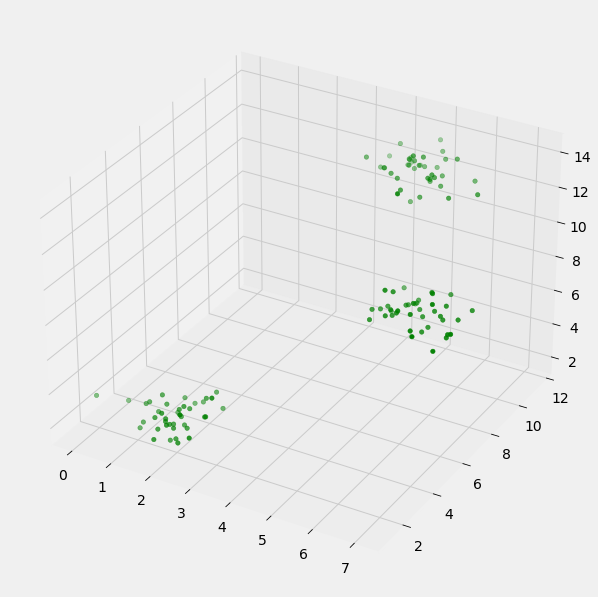

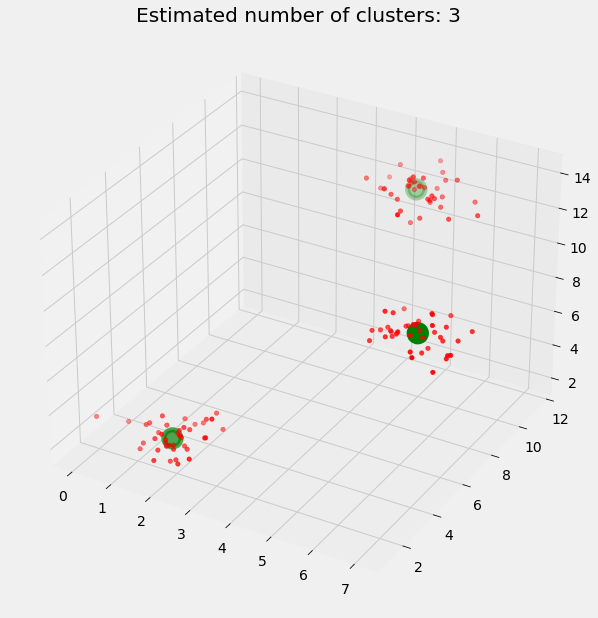

In [40]:
#Cau 4
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Read data
X = pd.read_csv('https://raw.githubusercontent.com/ltdaovn/dataset/master/MeanShift-3D.csv', sep='\t')

#Visualizing the data points:
data_fig = plt.figure(figsize=(12, 10))
ax = data_fig.add_subplot(111, projection ='3d')
ax.scatter( X.iloc[:, 0],
X.iloc[:, 1],
X.iloc[:, 2], marker ='o',color ='green')

plt.show()
#Importing libraries:
from sklearn.cluster import estimate_bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
#Now we can define the mean shift cluster model and fit it into our data.
msc = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msc.fit(X)
cluster_centers = msc.cluster_centers_
labels = msc.labels_
cluster_label = np.unique(labels)
n_clusters = len(cluster_label)
n_clusters

#Visualizing the clusters:
msc_fig = plt.figure(figsize=(12, 10))
ax = msc_fig.add_subplot(111, projection ='3d')
ax.scatter( X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], marker ='o',color ='red')

ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], marker ='o', color ='green', s = 300, linewidth = 5, zorder = 10)
plt.title('Estimated number of clusters: %d' % n_clusters)
plt.show()

In [47]:
# Nạp các gói thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt

# 1. Chuẩn bị dữ liệu
# Đọc dữ liệu từ tập tin csv
df = pd.read_csv('https://raw.githubusercontent.com/ltdaovn/dataset/master/Eurojobs.csv')
# Lấy dữ liệu thu nhập hằng năm (Annual Income) và điểm thành viên (Spending Score) để phân lớp
X = df.iloc[:, [0, 7]].values
#print(X)

# 2. Tiến hành gom nhóm
# Khi tiến hành các giải thuật để gom nhóm,
# câu hỏi đặt ra là với dataset đã có,
# chúng ta sẽ phân thành bao nhiêu cụm là hợp lý (tối ưu)?
# Trong ví dụ này chúng ta sẽ sử dụng Dendrogram để xác định số cụm.
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Country')
plt.ylabel('Khoảng cách Euclidean')
plt.show()

# Qua đồ thị Dendrogram, chúng ta thấy số cụm tối ưu có khả năng là 5 cụm
# Chúng ta tiến hành gom cụm với số cụm là 5
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Hiển thị các cụm dữ liệu
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Phân khúc khách hàng')
plt.xlabel('Thu nhập')
plt.ylabel('Điểm thành viên')
plt.legend()
plt.show()
# Lấy dữ liệu thu nhập hằng năm (Annual Income) và điểm thành viên (Spending Score) để phân lớp
X = df.iloc[:, [3, 4]].values
#print(X)

# 2. Tiến hành gom nhóm
# Khi tiến hành các giải thuật để gom nhóm,
# câu hỏi đặt ra là với dataset đã có,
# chúng ta sẽ phân thành bao nhiêu cụm là hợp lý (tối ưu)?
# Trong ví dụ này chúng ta sẽ sử dụng Dendrogram để xác định số cụm.
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Khách hàng')
plt.ylabel('Khoảng cách Euclidean')
plt.show()

# Qua đồ thị Dendrogram, chúng ta thấy số cụm tối ưu có khả năng là 5 cụm
# Chúng ta tiến hành gom cụm với số cụm là 5
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Hiển thị các cụm dữ liệu
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Phân khúc khách hàng')
plt.xlabel('Thu nhập')
plt.ylabel('Điểm thành viên')
plt.legend()
plt.show()

ValueError: ignored